Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib
in loop 0 the values of y[100:105] and x[100:105] are: [116 117 117 117 117] [154 149 150 151 153]
in loop 1 the values of y[100:105] and x[100:105] are: [116 117 117 117 117] [154 149 150 151 153]
in loop 2 the values of y[100:105] and x[100:105] are: [116 117 117 117 117] [154 149 150 151 153]
in loop 3 the values of y[100:105] and x[100:105] are: [116 117 117 117 117] [154 149 150 151 153]
in loop 4 the values of y[100:105] and x[100:105] are: [116 117 117 117 117] [154 149 150 151 153]
in loop 5 the values of y[100:105] and x[100:105] are: [116 117 117 117 117] [154 149 150 151 153]
in loop 6 the values of y[100:105] and x[100:105] are: [116 117 117 117 117] [154 149 150 151 153]


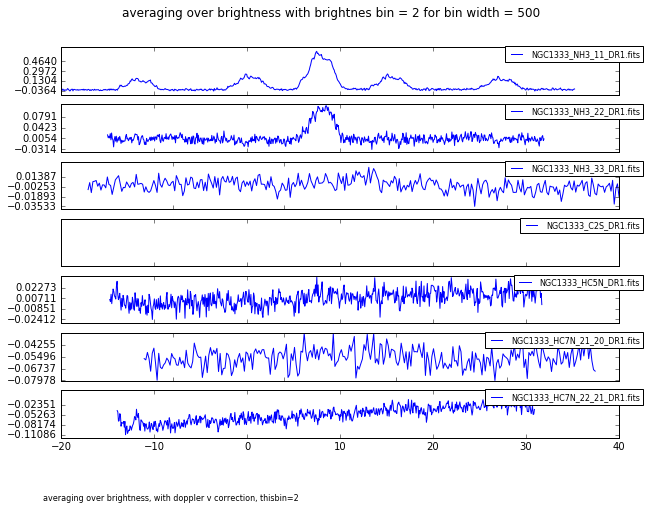

In [17]:
# What are the variables we want set as default?
# Taking out the user input leaves much less comparison options? what do we want to compare actually?
# Now bin_width=500, wanted_bin=0 occure as kew words in main() and in binning() function. Is this OK?


import GAS
from spectral_cube import SpectralCube
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as nd
import astropy.units as u
from astropy.io import fits
vlsr = fits.getdata('NGC1333_Vlsr_v1.fits')
%pylab
%matplotlib inline


files =['NGC1333_NH3_11_DR1.fits', 'NGC1333_NH3_22_DR1.fits', 'NGC1333_NH3_33_DR1.fits', 
       'NGC1333_C2S_DR1.fits',
       'NGC1333_HC5N_DR1.fits',
        'NGC1333_HC7N_21_20_DR1.fits', 'NGC1333_HC7N_22_21_DR1.fits']


def main(bin_width=500, thisbin=2):   
    # This is the main routine.
    loop_count = 0
    fig = plt.figure(figsize=(10,7))
    # for plotting plots in a single figure put plt.figure before all the .plot commands
    # otherwise you will get the plots in a different figures
    
    ax1 = plt.subplot(len(files), 1, 1)
    
    f_nam = 'NGC1333_NH3_11_DR1.fits'
    y, x = binning(f_nam)
    # This takes in a 2D map and returns a 2D map where the image values are the bin to which a pixel belongs.
    
    for file_name in files:            
        print 'in loop', loop_count, 'the values of y[100:105] and x[100:105] are:', y[100:105], x[100:105]
#         sp_av, cube = averaging(file_name, y, x)
        thiscube_spectrum_dv, cube = averaging_over_dopplervel(file_name, y, x)
        #Change to velocity axis and such here as well.  Then average all spectra with that bin label.
        ax = fig.add_subplot(len(files),1,loop_count+1)
        plt.plot(cube.spectral_axis,thiscube_spectrum_dv)
        plt.yticks(np.arange(min(thiscube_spectrum_dv), max(thiscube_spectrum_dv), (max(thiscube_spectrum_dv)-min(thiscube_spectrum_dv))/4))
        
        if file_name != files[-1]:
            plt.setp(ax.get_xticklabels(), visible=False)

        plt.legend([file_name], bbox_to_anchor=(1.05, 1.1), prop={'size':8})
        loop_count += 1        

#     plt.legend(leg, loc = 5, prop={'size':8})
#     ax.legend(bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0.)
#     fig.legend(curves_names, leg, bbox_to_anchor=(0.5, -0.15))
    plt.savefig("averaging_over_brightness_with_doppler_v_correction_thisbin=2.png")    
    figtext(.1,.0,'averaging over brightness, with doppler v correction, thisbin=2' , fontsize=8)
    fig.suptitle("averaging over brightness with brightnes bin = %r for bin width = %r" %(thisbin, bin_width), fontsize=12)
    plt.show()

def binning(f_nam, bin_width=500, thisbin=2):
    """A function creating brightness bins of pixels, and eventualy a map, in the given spectral cube"""
    cube = SpectralCube.read(f_nam)
    cube = cube.with_spectral_unit(u.km/u.s,velocity_convention='radio')
    Tmax = cube.apply_numpy_function(np.nanmax,axis=0) # array of the maximum values in the spectra of each pixel
    baddata = nd.morphology.binary_dilation(np.isnan(Tmax),np.ones((25,25)))
    Tmax[baddata]=0.0
    Tmax[np.isfinite(Tmax)]
    bin_arr = np.sort(Tmax[np.isfinite(Tmax)])
    bin_arr2 = bin_arr[:: - bin_width] # this creates an array of the bin margins, in which every bin has a width of "bin_width"  
    np.digitize(Tmax,bin_arr2)
    bins = np.digitize(Tmax,bin_arr2)
    y, x = np.where(bins==thisbin)
    return y, x

def averaging(file_name, y, x):
    cube = SpectralCube.read(file_name)
    cube = cube.with_spectral_unit(u.km/u.s,velocity_convention='radio')
    sp_av = np.nanmean(cube.filled_data[:,y,x].value,axis=1)
    return sp_av, cube

def averaging_over_dopplervel(file_name, y, x):
    cube = SpectralCube.read(file_name)
    cube = cube.with_spectral_unit(u.km/u.s,velocity_convention='radio')
    sp_av = np.nanmean(cube.filled_data[:,y,x].value,axis=1)
    thiscube_spectrum_dv = GAS.gasBinning.BinByMask(cube, CentroidMap = vlsr, x = x, y = y)
#   Erik, try the following line instead of the previous:  thiscube_spectrum_dv = GAS.gasBinning.BinByMask(sp_av, CentroidMap = vlsr, x = x, y = y)
    return thiscube_spectrum_dv, cube

main()


In [10]:
def main():    
#     var = func1(1)
#     func1(1)
    _,x,_,_ = func1(1)
    func2(1)
    
    number, p, q, y = func1(5)
    
def func1(number):
    y = 4
    print "Something is performed in func1"
    return number, 2, 3, y
    
def func2(x):
        
    print 'in func2 var =', x
    print func1(1)[1]
    _, _, _, w = func1(1)
    print 'w=', w
    print y
    print x
    
main()

Something is performed in func1
in func2 var = 1
Something is performed in func1
2
Something is performed in func1
w= 4


NameError: global name 'y' is not defined

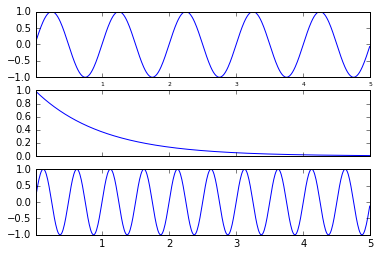

In [7]:
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.01, 5.0, 0.01)
s1 = np.sin(2*np.pi*t)
s2 = np.exp(-t)
s3 = np.sin(4*np.pi*t)

ax1 = plt.subplot(311)
plt.plot(t, s1)
plt.setp(ax1.get_xticklabels(), fontsize=6)

# share x only
ax2 = plt.subplot(312, sharex=ax1)
plt.plot(t, s2)
# make these tick labels invisible
plt.setp(ax2.get_xticklabels(), visible=False)

# share x and y
ax3 = plt.subplot(313, sharex=ax1, sharey=ax1)
plt.plot(t, s3)
plt.xlim(0.01, 5.0)
plt.show()


In [68]:
from matplotlib.pyplot import *

ficheiros = ['120318.nc', '120319.nc', '120320.nc', '120321.nc']

fig = figure()
fig.suptitle('concentration profile analysis')

for a in range(len(ficheiros)):
    # dados is here defined
    level = dados.variables['level'][:]

    ax = fig.add_subplot(2,2,a+1)
    xticks(range(8), ['0h','3h','6h','9h','12h','15h','18h','21h']) 
    ax.set_xlabel('time (hours)')
    ax.set_ylabel('CONC ($\mu g. m^{-3}$)')

    for index in range(len(level)):
        conc = dados.variables['CONC'][4:12,index] * 1e9
        ax.plot(conc,label=str(level[index])+'m')

    dados.close()

ax.legend(bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0.)
         # it will place the legend on the outer right-hand side of the last axes

show()

NameError: name 'dados' is not defined

In [33]:
?savefig